## Load the dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

# load the dataset

def load_and_preprocess_dataset(filepath):
    dataset = pd.read_csv(filepath, sep=',', comment='#')

   
    print(dataset.head())

    # separate the features (X) and the target variable (y)
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    # check if X is not empty
    if X.empty:
        raise ValueError("Features DataFrame (X) is empty after slicing. Check the dataset structure.")

    # handle missing values using imputation
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    return X_scaled, y

X, y = load_and_preprocess_dataset('../Normalization/A1-turbine-normalized.csv')



   Height over Sea Level    Fall 1    Fall 2    Fall 3      Flow
0               1.458733  1.494763  1.565871 -1.363870 -0.920759
1              -0.889207 -0.864935 -0.908663  0.322233 -0.087759
2              -1.160123 -1.144520 -1.180093  0.322233 -0.250873
3               1.639344  1.637351  1.545514  1.165284  2.003763
4               0.736290  0.724040  0.742534  0.041216  0.473213


## Splitting the dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cross-Validation and Model Training

In [14]:


# if y_train is a pandas Series, reset its index to ensure compatibility
if isinstance(y_train, pd.Series):
    y_train = y_train.reset_index(drop=True)


kf = KFold(n_splits=5)
train_errors = []
val_errors = []
train_mapes = []
val_mapes = []

# counts for the current fold
fold = 1

# it iterates over each train-test split provided by KFold
for train_index, val_index in kf.split(X_train):
    # splitting the data into training and validation sets for the current fold
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv = y_train.iloc[train_index] if isinstance(y_train, pd.Series) else y_train[train_index]
    y_val_cv = y_train.iloc[val_index] if isinstance(y_train, pd.Series) else y_train[val_index]

    # initializing and training the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)

    # predictions and MAPE for training and validation sets
    y_train_pred = model.predict(X_train_cv)
    train_mape = mean_absolute_percentage_error(y_train_cv, y_train_pred)
    train_mapes.append(train_mape)

    y_val_pred = model.predict(X_val_cv)
    val_mape = mean_absolute_percentage_error(y_val_cv, y_val_pred)
    val_mapes.append(val_mape)

    fold += 1

# average training and validation MAPE
avg_train_mape = np.mean(train_mapes)
avg_val_mape = np.mean(val_mapes)


## Final Model Training and Evaluation

In [20]:
model_final = LinearRegression()
model_final.fit(X_train, y_train)

# making predictions on the test dataset using the fitted model
y_pred_test = model_final.predict(X_test)

# calculating the Mean Absolute Percentage Error (MAPE) on the test dataset
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Test MAPE: {test_mape * 100:.2f}%')


Test MAPE: 20.39%


## Visualization of Predictions

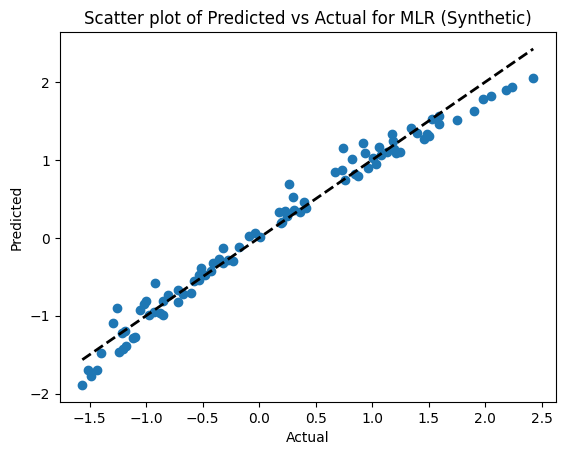

In [16]:
plt.scatter(y_test, y_pred_test)
plt.title('Scatter plot of Predicted vs Actual for MLR (Synthetic)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # diagonal line
plt.show()
